In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def make_df(filename, ID, slicing = 0):
    df = pd.read_csv(filename)
    
    if slicing:
        l = len(df)
        df = df.head(slicing)
        print(f'sliced into {len(df)} out of {l} data.')
        
    df.rename(columns={'Date' : 'ds' , 'S' : 'y'}, inplace = True)
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace = True)
    df_daily = df.resample('D').mean()
    df = df_daily.reset_index()
    
    df_daily['H'].fillna(method='ffill', inplace = True)
    
    df_daily = df_daily.interpolate(method='polynomial', order = 2)
    
    df['ID'] = ID
    df = df[['ds','y','H','ID']]
    df.set_index('ds', inplace = True)

    return df

df1 = make_df('H-S_seq_1.csv',ID = 'data1')
df2 = make_df('H-S_seq_2.csv',ID = 'data2')
df3 = make_df('H-S_seq_3.csv',ID = 'data3')
df4 = make_df('H-S_seq_4.csv',ID = 'data4')
df5 = make_df('H-S_seq_5.csv',ID = 'data5')
df6 = make_df('H-S_seq_6.csv',ID = 'data6')
df7 = make_df('H-S_seq_7.csv',ID = 'data7')
df8 = make_df('H-S_seq_8.csv',ID = 'data8')

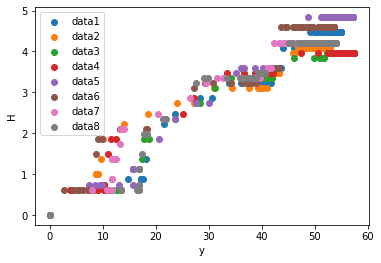

<Figure size 1440x1440 with 0 Axes>

In [15]:
plt.scatter(df1['y'],df1['H'], label = 'data1')
plt.scatter(df2['y'],df2['H'], label = 'data2')
plt.scatter(df3['y'],df3['H'], label = 'data3')
plt.scatter(df4['y'],df4['H'], label = 'data4')
plt.scatter(df5['y'],df5['H'], label = 'data5')
plt.scatter(df6['y'],df6['H'], label = 'data6')
plt.scatter(df7['y'],df7['H'], label = 'data7')
plt.scatter(df8['y'],df8['H'], label = 'data8')
plt.legend(loc = "best")
plt.xlabel('y')
plt.ylabel('H')
plt.figure(figsize=(20,20))
plt.show()